In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline

#### Первая лабораторная. 5.04

##### Построение градуировочной кривой монохроматора по ртути

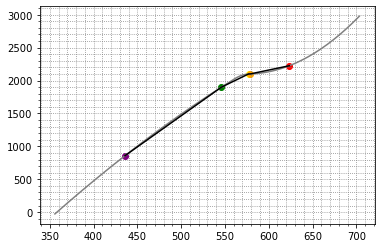

In [4]:
#%matplotlib widget

plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='both', color='gray', linestyle=':')

# l - длина волны, a - угол поворота призмы монохроматора
l = np.array([435.8, 546.0, 576.9, 579.0, 623.4])
a = np.array([858, 1900, 2100, 2101, 2225])
 
xnew = np.linspace (l. min () - 80, l. max () + 80, 200 ) 

spline = make_interp_spline (l, a, k = 2 )
y_smooth = spline (xnew)
 
plt.plot (xnew, y_smooth, color = "grey")
plt.plot(l, a, color = "black")
plt.scatter(435.8, 858, color = "purple")
plt.scatter(546.0, 1900, color = "green")
plt.scatter(576.9, 2100, color = "yellow")
plt.scatter(579.0, 2101, color = "orange")
plt.scatter(623.4,  2225, color = "red")
plt.show()

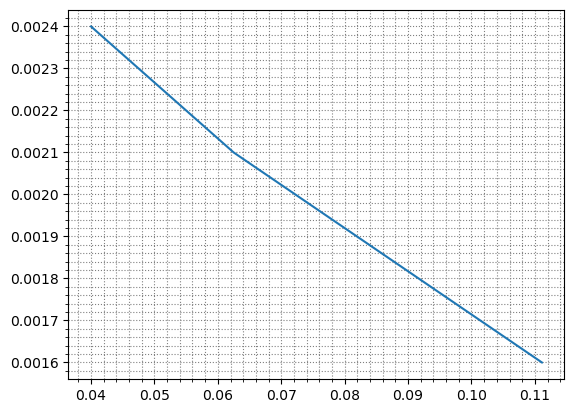

In [42]:
plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='both', color='gray', linestyle=':')

v = np.array([0.0016, 0.0021, 0.0024])
n = np.array([1/9, 1/16, 1/25])
plt.plot(n, v)

#### Вторая лабораторная. 5.08

In [126]:
h = 6.64*10**(-34)
m = 9.109383701528*10**(-31)
e = 1.602176634*10**(-19)
u = np.array([5000, 4500, 4000, 3500, 3000, 2500])
l = lambda u : h/(np.sqrt(2*m*e*u))
print(l(u))

p = lambda u : np.sqrt(2*m*e*u)
print(p(u))
p_u = p(u)
log_p = np.log(p_u)
print(log_p)


[1.73807449e-11 1.83209137e-11 1.94322635e-11 2.07739635e-11
 2.24384451e-11 2.45800851e-11]
[3.82031958e-23 3.62427338e-23 3.41699771e-23 3.19630868e-23
 2.95920682e-23 2.70137388e-23]
[-51.61912306 -51.67180332 -51.73069483 -51.79746053 -51.87453587
 -51.96569665]


In [160]:
l = 130
d1 = np.array([15.45, 15.55, 16.9, 18.75, 21.1, 22.9])
d2 = np.array([23.05, 23.2, 24.65, 27.5, 28.15, 33.25])
sin_v = lambda d: np.sin(np.arctan(d/(2*l)))

sin1 = sin_v(d1)
sin2 = sin_v(d2)
print(sin1, sin2)
d = lambda sin, ll: ll/(2*sin)

ll = np.array([17.381, 18.321, 19.432, 20.774, 22.438, 24.580])
print("d1   ", d(sin1, ll))
print("d2   ", d(sin2, ll*2))
print("sum d1/6   ", np.sum(d(sin1, ll))/6)
print("sum d2/6   ", np.sum(d(sin2, ll*2))/6)

l = lambda sin, d : 2*d*sin
l1 = l(np.array(sin1), 123)*10**(-12)
l2 = l(np.array(sin2), 213/2)*10**(-12)

log_l1 = np.log(l1)
log_l2 = np.log(l2)

print(l1)
print(l2)

print(log_l1)
print(log_l2)

h = lambda p, l : p*l

print(np.sum(np.log(h(p_u, l1)))/6)
print(np.sum(np.log(h(p_u, l2)))/6)

[0.05931844 0.05970101 0.06486312 0.07192859 0.08088792 0.08773727] [0.0883075  0.08887764 0.09438445 0.10518252 0.10764018 0.12685153]
d1    [146.50587703 153.43960606 149.79236025 144.40711223 138.69808732
 140.07730499]
d2    [196.82360211 206.13732957 205.88136265 197.50429673 208.45376232
 193.76983913]
sum d1/6    145.48672464463257
sum d2/6    201.42836541851557
[1.45923361e-11 1.46864493e-11 1.59563278e-11 1.76944332e-11
 1.98984287e-11 2.15833678e-11]
[1.88094972e-11 1.89309380e-11 2.01038887e-11 2.24038771e-11
 2.29273578e-11 2.70193753e-11]
[-24.95052465 -24.94409586 -24.86116564 -24.75777103 -24.64038035
 -24.55909811]
[-24.6966592  -24.6902236  -24.63010785 -24.52178709 -24.49869025
 -24.3344669 ]
-76.56205831661994
-76.33854152699344


-1.2391614904952988 -88.94501575585728
5.617208572222935e-34
-1.049738956740812 -78.91385322587102
7.024131901220854e-34


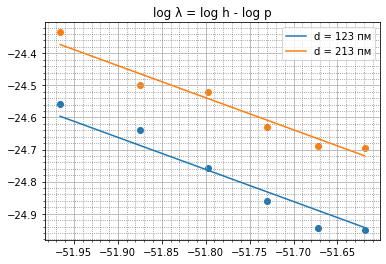

In [158]:
# прямая имеет вид y = bx + a
def coefficients(X, Y):
    x_middle = np.sum(X) / len(X)
    y_middle = np.sum(Y) / len(Y)
    b = 0 # числитель 
    s = 0 # знаменатель 
    for k in range(len(X)):
        b += (X[k] - x_middle) * (Y[k] - y_middle)
        s += (X[k] - x_middle)**2
    b /= s
    a = y_middle - x_middle*b
    return b, a

x1 = log_p
y1 = log_l1

b, a = coefficients(x1, y1)
print(b, a)
a = -76.56205831661994
b = -1
x = np.linspace(min(x1), max(x1))
y = a + b*x
plt.plot(x, y, label = "d = 123 пм")
plt.scatter(x1, y1)
print(np.exp(a))

y2 = log_l2
b, a = coefficients(x1, y2)
print(b, a)
a = -76.33854152699344
b = -1
y = a + b*x
plt.plot(x, y, label = "d = 213 пм")
plt.scatter(x1, y2)
print(np.exp(a))

plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='minor', color='gray', linestyle=':')
plt.title("log λ = log h - log p")
plt.legend()


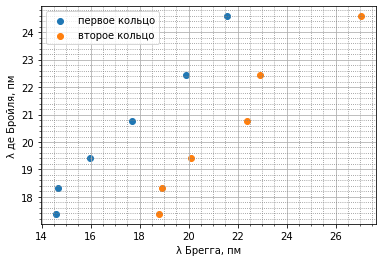

In [153]:
plt.scatter(l1*10**(12), ll, label = "первое кольцо")

plt.scatter(l2*10**(12), ll, label = "второе кольцо")
#plt.scatter(x1, y2)

plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='minor', color='gray', linestyle=':')
plt.xlabel("λ Брегга, пм")
plt.ylabel("λ де Бройля, пм")
plt.legend()

#### Третья лабораторная. 5.02

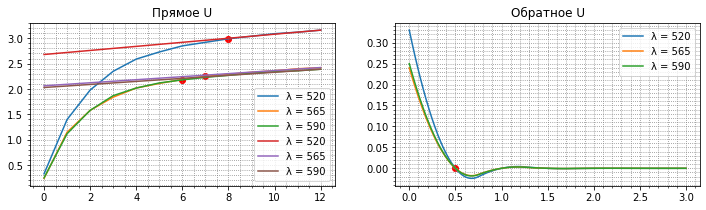

In [44]:
u = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
i_520 = [0.33, 1.4, 1.98, 2.35, 2.59, 2.73, 2.85, 2.92, 2.99, 3.04, 3.09, 3.12, 3.16]
i_565 = [0.24, 1.15, 1.58, 1.84, 2.02, 2.11, 2.19, 2.25, 2.29, 2.33, 2.36, 2.40, 2.42]
i_590 = [0.25, 1.12, 1.58, 1.87, 2.02, 2.12, 2.18, 2.23, 2.27, 2.31, 2.34, 2.36, 2.39]

fig = plt.figure(figsize=(12,3))
ax = fig.subplots(1, 2)

ax[0].minorticks_on()
ax[0].grid(True, which='both')
ax[0].grid(which='both', color='gray', linestyle=':')
ax[1].minorticks_on()
ax[1].grid(True, which='both')
ax[1].grid(which='both', color='gray', linestyle=':')

ax[0].set_title("Прямое U")

ax[0].plot(u, i_520, label = "λ = 520")
ax[0].plot(u, i_565, label = "λ = 565")
ax[0].plot(u, i_590, label = "λ = 590")

# прямая имеет вид y = bx + a
def coefficients(X, Y):
    x_middle = np.sum(X) / len(X)
    y_middle = np.sum(Y) / len(Y)
    b = 0 # числитель 
    s = 0 # знаменатель 
    for k in range(len(X)):
        b += (X[k] - x_middle) * (Y[k] - y_middle)
        s += (X[k] - x_middle)**2
    b /= s
    a = y_middle - x_middle*b
    return b, a

b, a = coefficients(u[11:], i_520[11:])
x = np.linspace(min(u), max(u))
y = a + b*x
ax[0].plot(x, y, label = "λ = 520")
b, a = coefficients(u[10:], i_565[10:])
x = np.linspace(min(u), max(u))
y = a + b*x
ax[0].plot(x, y, label = "λ = 565")
b, a = coefficients(u[11:], i_590[11:])
x = np.linspace(min(u), max(u))
y = a + b*x
ax[0].plot(x, y, label = "λ = 590")

ax[0].scatter([u[8], u[6], u[7]], [i_520[8], i_590[6], i_565[7]], color = "red")

ax[0].legend()

u = [0, 0.5, 1, 1.5, 2, 2.5, 3]
u = np.array(u)
i_520 = [0.33, 0, 0, 0, 0, 0, 0]
i_565 = [0.24, 0, 0, 0, 0, 0, 0]
i_590 = [0.25, 0, 0, 0, 0, 0, 0]

ax[1].set_title("Обратное U")
xnew = np.linspace (u.min (), u.max (), 100 ) 

spline = make_interp_spline (u, i_520, k = 2 )
y_smooth = spline (xnew)
ax[1].plot(xnew, y_smooth, label = "λ = 520")

spline = make_interp_spline (u, i_565, k = 2 )
y_smooth = spline (xnew)
ax[1].plot(xnew, y_smooth, label = "λ = 565")

spline = make_interp_spline (u, i_590, k = 2 )
y_smooth = spline (xnew)
ax[1].plot(xnew, y_smooth, label = "λ = 590")

ax[1].scatter([u[1]], [0], color = "red")

ax[1].legend()

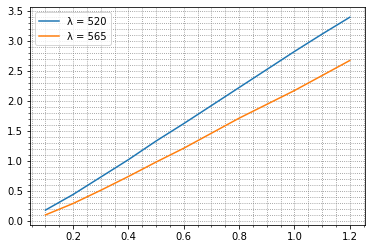

In [11]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
i_520 = [0.18, 0.44, 0.73, 1.02, 1.33, 1.62, 1.92, 2.22, 2.52, 2.82, 3.11, 3.39]
i_565 = [0.1, 0.29, 0.51, 0.74, 0.98, 1.21, 1.46, 1.71, 1.94, 2.17, 2.42, 2.67]

plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='both', color='gray', linestyle=':')

plt.plot(x, i_520, label = "λ = 520")
plt.plot(x, i_565, label = "λ = 565")

plt.legend()


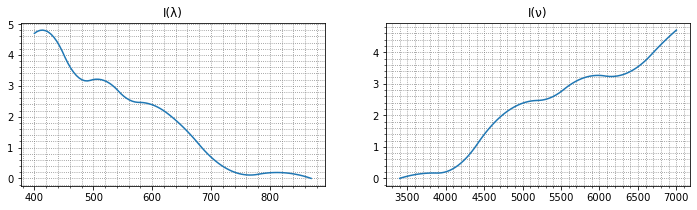

In [32]:
l = [400, 430, 470, 520, 565, 590, 660, 700, 860, 870]
l = np.array(l)
h = [7000, 6972, 6378, 5765, 5306, 5081, 4542, 4283, 3486, 3400]
h = np.array(h)
h.sort()
i = [4.7, 4.64, 3.36, 3.16, 2.51, 2.44, 1.52, 0.69, 0.06, 0]
i_= [0, 0.06, 0.69, 1.52, 2.44, 2.51, 3.16, 3.36,  4.64, 4.7]

fig = plt.figure(figsize=(12,3))
ax = fig.subplots(1, 2)

ax[0].minorticks_on()
ax[0].grid(True, which='both')
ax[0].grid(which='both', color='gray', linestyle=':')
ax[1].minorticks_on()
ax[1].grid(True, which='both')
ax[1].grid(which='both', color='gray', linestyle=':')

ax[0].set_title("I(λ)")
xnew = np.linspace (l.min (), l.max (), 100 ) 
spline = make_interp_spline (l, i, k = 2 )
y_smooth = spline (xnew)
ax[0].plot(xnew, y_smooth)

ax[1].set_title("I(ν)")
xnew = np.linspace (h.min (), h.max (), 100 ) 
spline = make_interp_spline (h, i_, k = 2 )
y_smooth = spline (xnew)
ax[1].plot(xnew, y_smooth)